$\boldsymbol{x}\in\mathbb{R}^{d}$, kde d$\in\mathbb{N}$ je konečné, např. 100. Dál pro $\boldsymbol{x}$ platí 

$\sum_{k=1}^{d}x_{k}=1\wedge\left(\forall k\in\left\{ 1,2,\ldots,d\right\} \right)\left(\boldsymbol{x}_{k}>0\right)$.

Tato podmínka dává $\boldsymbol{x}$ formu distribuce. 

V mojí optimalizaci mám data $\left\{ \alpha\right\} _{i\in\mathbb{N}}\in\mathbb{R}^{d}$ bez dalších omezení. Optimalizuju funkcionál

$-\sum_{i}\boldsymbol{\alpha}_{i}\cdot\boldsymbol{x}$,

kde struktura $\alpha_{i,k}=\left\{ \begin{array}{cc}
k\Delta-\Delta_{i,0}, & \text{ pro }k<m_{i},\\
0, & \text{ jinak}.
\end{array}\right.$.

To znamená, že $\boldsymbol{\alpha}_{i}$ závisí pouze na dvou parametrech $\Delta_{i}\in\mathbb{R}$ a $0\leq m_{i}\leq d$.

In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

In [2]:
# Import external libraries
import numpy as np

In [3]:
import objfun_distribution_opt as dopt

In [4]:
alphas = [{"r": 15, "m": 10},{"r": 12, "m": 9.5},{"r": 12, "m": 9.5},{"r": 12, "m": 9.5},{"r": 12, "m": 9.5}]
delta = 1
d = 15
problem = dopt.VolumeDistribution(d, delta, alphas)

x = problem.generate_point()
# print(x)
# x = np.reshape([0 if i != 9 else 1 for i in range(0,d)],(1, d))
# print(x)
print(problem.alphas)

print(problem.evaluate(x))

[[ 5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.   0.   0.   0.
   0. ]
 [ 2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5  0.   0.   0.   0.
   0. ]
 [ 2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5  0.   0.   0.   0.
   0. ]
 [ 2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5  0.   0.   0.   0.
   0. ]
 [ 2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5  0.   0.   0.   0.
   0. ]]
-24.462219729767423


- penalizace
- jako $f^{*}$ nastavit nějaké dobré řešení

### Heuristics application

In [5]:
alphas = [{"r": 15, "m": 10},{"r": 5, "m": 5},{"r": 6, "m": 6},{"r": 5, "m": 5},{"r": 7, "m": 7}, {"r": 20, "m": 1},
          {"r": 0, "m": 14},{"r": 0, "m": 14},{"r": 0, "m": 14},{"r": 0, "m": 14},{"r": 0, "m": 14}]
delta = 1
d = 15
prob_unlimited = dopt.VolumeDistribution(d, delta, alphas)

x_star = np.zeros(d)
s = 0
for a in alphas:
    x_star[int(a["m"] / delta)] += a["r"]
    s += a["r"]
x_star /= s

print(prob_unlimited.evaluate(x_star))
prob = dopt.VolumeDistribution(d, delta, alphas, prob_unlimited.evaluate(x_star))

19.63793103448276


In [6]:
for i in range(100):
    _x = prob.generate_point()
    f = prob.evaluate(_x)
    if f < prob.get_fstar(): 
        print((_x, prob.evaluate(_x)))

(array([0.05747632, 0.11541648, 0.0330197 , 0.01319321, 0.11594836,
       0.02609645, 0.10522941, 0.00143567, 0.09537737, 0.05078093,
       0.06460766, 0.05925336, 0.07502259, 0.05680744, 0.13033505]), 18.159270438981835)
(array([0.04935248, 0.06586743, 0.08627163, 0.0823446 , 0.02736701,
       0.10131935, 0.03804198, 0.07435781, 0.00055191, 0.08182841,
       0.10903986, 0.05221351, 0.07424327, 0.0526393 , 0.10456145]), 18.623788497124348)
(array([0.03715142, 0.09244947, 0.04479644, 0.02802264, 0.02175653,
       0.13466213, 0.07821918, 0.07075063, 0.09624765, 0.0545951 ,
       0.0029948 , 0.13617563, 0.09111074, 0.08637367, 0.02469398]), 18.604250565908686)
(array([0.11697839, 0.00313837, 0.05253366, 0.01906579, 0.02952076,
       0.10497863, 0.08204235, 0.00101969, 0.10993327, 0.12432819,
       0.01092838, 0.11882802, 0.11166342, 0.02060663, 0.09443447]), 18.539104403912045)
(array([0.02829203, 0.05159816, 0.04050662, 0.10618088, 0.09953108,
       0.00445858, 0.12708336, 0.112

## Random shooting test

In [7]:
from heur_sg import ShootAndGo

for i in range(10):
    sg = ShootAndGo(prob, 1000, 0)
    sg.search()
    print(sg.best_y, sg.best_x, sg.neval)

19.388505305728906 [0.11479162 0.00362504 0.04339612 0.01032117 0.12234507 0.07504351
 0.06894591 0.12805486 0.0285889  0.05884214 0.11715667 0.13001866
 0.02652762 0.06545925 0.00688346] 1
18.629958523557754 [1.02686685e-01 4.37050161e-02 7.17367494e-05 9.14752116e-02
 1.25906336e-02 9.52142368e-02 1.07481164e-01 6.50699365e-02
 1.05510670e-01 6.49467362e-02 7.03403054e-02 5.47504229e-02
 7.80419653e-02 1.98167446e-02 8.82985353e-02] 3
18.4911382002604 [0.08036023 0.08927617 0.02909367 0.03328954 0.04937944 0.08597013
 0.01115777 0.11535217 0.0547501  0.05773755 0.03770533 0.10051045
 0.09291429 0.08900132 0.07350184] 1
17.481705812345183 [0.03030186 0.0342385  0.02551596 0.13914721 0.02132451 0.0270216
 0.10287417 0.04644167 0.14217821 0.09798934 0.07554846 0.06645237
 0.04675516 0.02074913 0.12346183] 1
19.3604759375584 [0.10625009 0.022465   0.06334106 0.06791809 0.03052666 0.04999562
 0.09097477 0.07209506 0.08330009 0.08453209 0.09781399 0.05994213
 0.04511775 0.01213783 0.113589

### Genetic optimization
when using the convex combination, the solution remains in the domain

In [8]:
import heur_aux

normCorr = heur_aux.NormalizeCorrection(prob)
xx = np.reshape([1 for i in range(15)],15)
print(normCorr.correct(xx))

## vectors = np.reshape([[-1 if i == j-1 else (1 if i == j else 0) for i in range(15)]for j in range(1,15)], (14, 15)).T
## print(vectors)
## print(np.dot(vectors[:,1],  vectors[:,0]))
## q, r = np.linalg.qr(vectors, mode = 'complete')
## 
## print(np.dot(q.T,np.dot(q.T,xx)))
## print(np.linalg.lstsq(vectors, xx))
## og_proj = heur_aux.OGProjectionCorrection(prob, vectors)


[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]


In [9]:
from heur_go import Crossover, UniformMultipoint, RandomCombination

In [10]:
from heur_go import GeneticOptimization
from heur_fsa import FastSimulatedAnnealing

In [11]:
from heur_aux import CauchyMutation, Mutation, NormalizeCorrection, ExtensionCorrection, MirrorCorrection, Correction

In [12]:
cauchy = CauchyMutation(r=1, correction=NormalizeCorrection(prob))
cauchy.mutate(np.array([6.12, -4.38,  2.96]))

array([0.1811666 , 0.76598425, 0.05284915])

In [13]:
heur = GeneticOptimization(prob, maxeval=10000, N=10, M=30, Tsel1=0.5, Tsel2=0.1, 
                           mutation=cauchy, crossover=UniformMultipoint(1))
res = heur.search()
res

{'best_y': 18.375043718103527,
 'best_x': array([0.00432032, 0.11148186, 0.05904637, 0.10128313, 0.05893264,
        0.02591216, 0.07426627, 0.10872596, 0.00888278, 0.11158645,
        0.02872139, 0.01948827, 0.1072412 , 0.06430127, 0.11580994]),
 'neval': 3,
 'log_data': Empty DataFrame
 Columns: []
 Index: []}

In [14]:
heur = GeneticOptimization(prob, maxeval=10000, N=10, M=30, Tsel1=0.5, Tsel2=0.1, 
                           mutation=cauchy, crossover=RandomCombination())
res = heur.search()
res

{'best_y': 17.303640446636724,
 'best_x': array([0.01039399, 0.04837845, 0.08019868, 0.0425757 , 0.09251967,
        0.05935067, 0.01608627, 0.10088779, 0.11836254, 0.04792441,
        0.11700063, 0.03881299, 0.08118422, 0.08477719, 0.06154679]),
 'neval': 1,
 'log_data': Empty DataFrame
 Columns: []
 Index: []}

In [15]:
sum(res['best_x'])

1.0

In [16]:
heur = GeneticOptimization( prob_unlimited, 
                            maxeval=10000,
                            N=10,
                            M=30,
                            Tsel1=0.5,
                            Tsel2=0.1, 
                            mutation=cauchy, crossover=UniformMultipoint(1) )
res = heur.search()
res

{'best_y': 0.14154456091202225,
 'best_x': array([1.17737194e-04, 1.14168202e-04, 6.86112897e-05, 1.91750793e-04,
        9.42495533e-04, 1.37686644e-04, 4.69849991e-03, 4.56656258e-05,
        7.89657384e-05, 7.50267077e-04, 2.26541998e-05, 2.44868330e-04,
        1.64851475e-04, 2.14194927e-04, 9.92207583e-01]),
 'neval': inf,
 'log_data': Empty DataFrame
 Columns: []
 Index: []}

In [17]:
heur = GeneticOptimization(prob_unlimited, maxeval=10000, N=10, M=30, Tsel1=0.5, Tsel2=0.1, 
                           mutation=cauchy, crossover=RandomCombination())
res = heur.search()
res

{'best_y': 0.05030245494189692,
 'best_x': array([1.50412614e-06, 3.27189486e-04, 1.27407732e-05, 6.70489773e-04,
        2.93218067e-04, 1.15850566e-04, 4.78765666e-07, 1.27684888e-04,
        1.70771151e-05, 1.80221947e-05, 5.84173514e-05, 6.14597157e-05,
        1.78036364e-04, 2.77895300e-05, 9.98090041e-01]),
 'neval': inf,
 'log_data': Empty DataFrame
 Columns: []
 Index: []}

In [18]:
import matplotlib.pyplot as plt

plt.plot(res['best_x'])

### Now, let us move to more complex setup of the problem

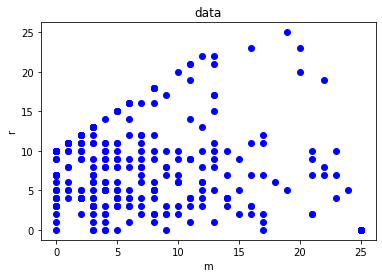

In [19]:
np.random.seed(123545)
alphas = [{"r": int(np.random.gamma(2, 5)), "m": int(np.random.gamma(1, 9))} for i in range(300)]

for alpha in alphas:
    if alpha['m'] >= 25:
        alpha['m'] = 25
        alpha['r'] = 0
    if alpha['r'] - alpha['m'] > 10:
        alpha['r'] = 10 + alpha['m']

#alphas = [{"r": i *2, "m": i * 2} for i in range(10)] 
#alphas = [{"r": 3, "m": 12}, {"r": 2, "m": 15}, {"r": 0, "m": 20} ] 
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('r')
ax1.set_xlabel('m')
ax1.set_title('data')
line, = ax1.plot([alpha['m'] for alpha in alphas], [alpha['r'] for alpha in alphas], 'bo')

plt.show()

10.117857142857126


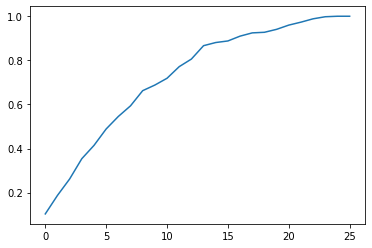

In [20]:
delta = 1
d = int(max([alpha['m'] for alpha in alphas])/delta) + 1
prob_unlimited = dopt.VolumeDistribution(d, delta, alphas)
prob_pen_unlimited = dopt.VolumeDistributionPenalization(d, delta, alphas, -np.inf, 1e-2)
x_star = np.zeros(d)
s = 0
for a in alphas:
    x_star[int(a["m"] / delta)] += a["r"]
    s += a["r"]
x_star /= s

plt.figure()
plt.plot(np.cumsum(x_star))
print(prob_unlimited.evaluate(x_star))

## Setup the problem of volume distribution fitness
prob = dopt.VolumeDistribution(d, delta, alphas, prob_unlimited.evaluate(x_star))
## Setup the problem with penalization
prob_pen = dopt.VolumeDistributionPenalization(d, delta, alphas, prob_unlimited.evaluate(x_star), 0)

Problem analysis

-63.350667887835684


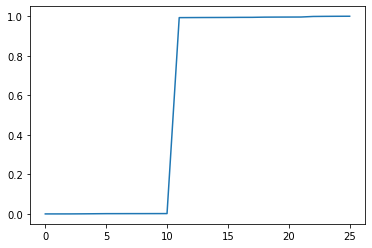

In [22]:
heur = GeneticOptimization( prob_unlimited, 
                            maxeval=10000,
                            N=50,
                            M=150,
                            Tsel1=0.5,
                            Tsel2=0.1, 
                            mutation=cauchy, crossover=UniformMultipoint(1) )
res = heur.search()
print(res['best_y'])
plt.plot(np.cumsum(res['best_x']))

-63.804984497054264


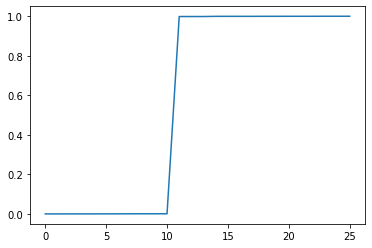

In [23]:
heur = GeneticOptimization( prob_unlimited, 
                            maxeval=10000,
                            N=10,
                            M=30,
                            Tsel1=0.5,
                            Tsel2=0.2, 
                            mutation=cauchy, crossover=RandomCombination() )
res = heur.search()
print(res['best_y'])
plt.plot(np.cumsum(res['best_x']))

-61.692007641154156


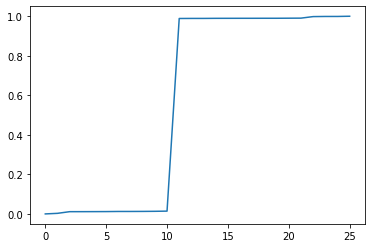

In [24]:
heur = FastSimulatedAnnealing( prob_unlimited,
                               maxeval=1000,
                               T0=1,
                               n0=1, 
                               alpha=2, 
                               mutation=cauchy )
res = heur.search()
print(res['best_y'])
plt.plot(np.cumsum(res['best_x']))

### utilization of problem with penalization

In [81]:
NUM_RUNS = 100
resultsPen = pd.DataFrame()
runs = []
corrections = [ {"name": "correction", 'corr': Correction(prob_pen)},
                {"name": "extension", 'corr': ExtensionCorrection(prob_pen)},
                {"name": "mirror", 'corr': MirrorCorrection(prob_pen)} ]
for correction in corrections: 
    for Cr in [0.01, 0.1, 0.5, 1]:
        for p in [0.8, 0.1, 0.01, 0.005]:
            prob_pen_unlimited.penalization = p
            heur_name = 'GO_DOP(p:{},Cr:{},corr{})'.format(p, Cr, correction['name'])
            for i in tqdm(range(NUM_RUNS), 'Testing {}'.format(heur_name)):
                run = GeneticOptimization( prob_pen_unlimited, 
                                            maxeval=1000,
                                            N=50,
                                            M=100,
                                            Tsel1=0.5,
                                            Tsel2=0.2, 
                                            mutation=CauchyMutation(r=Cr, correction=correction['corr']),
                                            crossover=UniformMultipoint(1) ).search()
                run['run'] = i
                run['heur'] = heur_name
                run['penalization'] = p
                run['correction'] = correction['name']
                run['Cr'] = Cr
                runs.append(run)

            res_df = pd.DataFrame(runs,
                                  columns=['heur',
                                           'penalization', 
                                           'correction', 
                                           'Cr',
                                           'run',
                                           'best_x',
                                           'best_y',
                                           'neval'] )
            resultsPen = pd.concat([results, res_df], axis=0)


C:\Users\Tom\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [83]:
def avg_sum(x):
    return np.mean(np.sum(x))
def admissibility_rate(x):
    return len([n for n in x if np.sum(n) == 1])/len(x)

results_pivot = resultsPen.pivot_table(
    index=['penalization', 'heur'],
    values=['best_x'],
    aggfunc=(avg_sum, admissibility_rate)
)['best_x']
results_pivot = results_pivot.reset_index()
results_pivot.sort_values(by='admissibility_rate')

,penalization,heur,admissibility_rate,avg_sum
0,0.005,"GO_DOP(p:0.005,Cr:0.01,corrcorrection)",0.00,10.456961
1,0.005,"GO_DOP(p:0.005,Cr:0.01,corrextension)",0.00,12.106172
2,0.005,"GO_DOP(p:0.005,Cr:0.01,corrmirror)",0.00,10.261784
3,0.005,"GO_DOP(p:0.005,Cr:0.1,corrcorrection)",0.00,13.437681
24,0.100,"GO_DOP(p:0.1,Cr:0.01,corrcorrection)",0.00,3.844908
14,0.010,"GO_DOP(p:0.01,Cr:0.01,corrmirror)",0.00,4.007862
12,0.010,"GO_DOP(p:0.01,Cr:0.01,corrcorrection)",0.00,3.935375
26,0.100,"GO_DOP(p:0.1,Cr:0.01,corrmirror)",0.18,3.846251
36,0.800,"GO_DOP(p:0.8,Cr:0.01,corrcorrection)",0.25,3.846112
15,0.010,"GO_DOP(p:0.01,Cr:0.1,corrcorrection)",0.31,4.093479


In [98]:
results_pivot = resultsPen.pivot_table(
    index=['heur'],
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
results_pivot = results_pivot.reset_index()
results_pivot.sort_values(by='rel')

,heur,feo,mne,rel
0,"GO_DOP(p:0.005,Cr:0.01,corrcorrection)",NaN,NaN,0.00
27,"GO_DOP(p:0.1,Cr:0.1,corrcorrection)",NaN,NaN,0.00
28,"GO_DOP(p:0.1,Cr:0.1,corrextension)",NaN,NaN,0.00
29,"GO_DOP(p:0.1,Cr:0.1,corrmirror)",NaN,NaN,0.00
30,"GO_DOP(p:0.1,Cr:0.5,corrcorrection)",NaN,NaN,0.00
31,"GO_DOP(p:0.1,Cr:0.5,corrextension)",NaN,NaN,0.00
32,"GO_DOP(p:0.1,Cr:0.5,corrmirror)",NaN,NaN,0.00
33,"GO_DOP(p:0.1,Cr:1,corrcorrection)",NaN,NaN,0.00
34,"GO_DOP(p:0.1,Cr:1,corrextension)",NaN,NaN,0.00
35,"GO_DOP(p:0.1,Cr:1,corrmirror)",NaN,NaN,0.00


### Comparison

In [93]:
## Setup the best found value 
prob.fstar = -50

NUM_RUNS = 100
maxeval = 1000

In [30]:
import pandas as pd
from tqdm.notebook import tqdm

In [94]:
results = pd.DataFrame()
runs = []
for setup in [{'N': 50, 'M': 150, 'multipoint': 1, 'T1': 0.5, 'T2': 0.1, 'Cr': 1,},
              {'N': 50, 'M': 100, 'multipoint': 1, 'T1': 0.5, 'T2': 0.1, 'Cr': 1,},
              {'N': 50, 'M': 100, 'multipoint': 1, 'T1': 0.5, 'T2': 0.2, 'Cr': 1,},
              {'N': 50, 'M': 100, 'multipoint': 1, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.1,},
              {'N': 50, 'M': 100, 'multipoint': 1, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.2,},
              {'N': 50, 'M': 100, 'multipoint': 1, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.01,},
              {'N': 50, 'M': 100, 'multipoint': 2, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.1,},
              {'N': 50, 'M': 100, 'multipoint': 4, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.1,},
              {'N': 50, 'M': 100, 'multipoint': 6, 'T1': 0.5, 'T2': 0.1, 'Cr': 0.1,}
             ]:
    heur_name = 'GO_(N:{},M:{},T1:{},T2:{},Cr:{},mult:{})'.format( setup['N'],
                                                                   setup['M'],
                                                                   setup['T1'],
                                                                   setup['T2'],
                                                                   setup['Cr'],
                                                                   setup['multipoint'] )
    for i in tqdm(range(NUM_RUNS), 'Testing {}'.format(heur_name)):
        run = GeneticOptimization( prob, 
                                   maxeval=maxeval,
                                   N=setup['N'],
                                   M=setup['M'],
                                   Tsel1=setup['T1'],
                                   Tsel2=setup['T2'], 
                                   mutation=CauchyMutation(r = setup['Cr'], correction =NormalizeCorrection(prob)),
                                   crossover=UniformMultipoint(setup['multipoint']) ).search()
        run['run'] = i
        run['heur'] = heur_name
        runs.append(run)
    
    res_df = pd.DataFrame(runs, columns=['heur', 'run', 'best_x', 'best_y', 'neval'])
    results = pd.concat([results, res_df], axis=0)


In [90]:
def rel(x):
    return len([n for n in x if n < np.inf])/len(x)
def mne(x):
    return np.mean([n for n in x if n < np.inf])
def feo(x):
    return mne(x)/rel(x)

In [95]:
results_pivot = results.pivot_table(
    index=['heur'],
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
results_pivot = results_pivot.reset_index()
results_pivot.sort_values(by='rel')

,heur,feo,mne,rel
5,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.2,mult:1)",448.407255,363.209877,0.81
0,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.01,mult:1)",439.484127,369.166667,0.84
4,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:6)",419.847751,356.870588,0.85
3,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:4)",452.492252,398.193182,0.88
1,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:1)",395.172840,355.655556,0.90
8,"GO_(N:50,M:150,T1:0.5,T2:0.1,Cr:1,mult:1)",391.111111,352.000000,0.90
7,"GO_(N:50,M:100,T1:0.5,T2:0.2,Cr:1,mult:1)",368.651129,335.472527,0.91
6,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:1,mult:1)",411.235822,378.336957,0.92
2,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:2)",373.506925,354.831579,0.95


In [92]:
results

,heur,run,best_x,best_y,neval
0,"GO_(N:50,M:150,T1:0.5,T2:0.1,Cr:1,mult:1)",0,"[0.002024563777743476, 0.002320444609727397, 0...",-55.695100,inf
1,"GO_(N:50,M:150,T1:0.5,T2:0.1,Cr:1,mult:1)",1,"[0.022877889183504647, 0.0003384486144899199, ...",-50.203711,inf
2,"GO_(N:50,M:150,T1:0.5,T2:0.1,Cr:1,mult:1)",2,"[0.0004711829818056682, 0.009003797072664091, ...",-50.458681,inf
3,"GO_(N:50,M:150,T1:0.5,T2:0.1,Cr:1,mult:1)",3,"[0.000599930511894724, 0.0007085135841716023, ...",-59.664381,inf
4,"GO_(N:50,M:150,T1:0.5,T2:0.1,Cr:1,mult:1)",4,"[0.0043624286420911726, 0.0017461739783471116,...",-58.483767,inf
...,...,...,...,...,...
895,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:6)",95,"[3.190228284684756e-05, 2.349436590700957e-06,...",-63.927771,469.0
896,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:6)",96,"[0.0014437370953422311, 0.00335715191664135, 0...",-59.974166,inf
897,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:6)",97,"[0.00029455357340046044, 0.0041182669619689955...",-58.188894,inf
898,"GO_(N:50,M:100,T1:0.5,T2:0.1,Cr:0.1,mult:6)",98,"[0.0003689906739485302, 2.513305735450797e-06,...",-61.683913,inf


In [96]:
results = pd.DataFrame()
runs = []
heur_name = 'RS_{}'.format(maxeval)
for i in tqdm(range(NUM_RUNS), 'Testing {}'.format(heur_name)):
    run = ShootAndGo(prob, maxeval, 0).search()
    run['run'] = i
    run['heur'] = heur_name
    runs.append(run)
    
res_df = pd.DataFrame(runs, columns=['heur', 'run', 'best_x', 'best_y', 'neval'])
results = pd.concat([results, res_df], axis=0)

In [97]:
results_pivot = results.pivot_table(
    index=['heur'],
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
results_pivot = results_pivot.reset_index()
results_pivot.sort_values(by='rel')

,heur,rel
0,RS_1000,0.0


In [37]:
results

,heur,run,best_x,best_y,neval
0,RS_1000,0,"[0.00867089370207187, 0.026735886059785184, 0....",-10.689130,inf
1,RS_1000,1,"[0.003490953454284475, 0.01961330975456638, 0....",-9.678849,inf
2,RS_1000,2,"[0.010253162089480444, 0.00022319151000462333,...",-7.822195,inf
3,RS_1000,3,"[0.004529077301825218, 0.01391902615734935, 0....",-10.951545,inf
4,RS_1000,4,"[1.852992791394559e-05, 0.02214038784666697, 0...",-14.155273,inf
...,...,...,...,...,...
95,RS_1000,95,"[0.0018124816858236688, 0.009304587624876987, ...",-13.897424,inf
96,RS_1000,96,"[0.002138686821887219, 0.006671157896134468, 0...",-11.109723,inf
97,RS_1000,97,"[0.001658941969327655, 0.01213691953299604, 0....",-8.721048,inf
98,RS_1000,98,"[0.0004240660667485522, 0.0027010988180098186,...",-11.531816,inf
